In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
%matplotlib inline

In [165]:
df = pd.read_csv("amazon-reviews-unlocked-mobile-phones\Amazon_Unlocked_Mobile.csv")

In [166]:
df.shape

(413840, 6)

In [167]:
df.head()

Product Name Brand Name   Price  \
0  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
1  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
2  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
3  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
4  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   

   Rating                                            Reviews  Review Votes  
0       5  I feel so LUCKY to have found this used (phone...           1.0  
1       4  nice phone, nice up grade from my pantach revu...           0.0  
2       5                                       Very pleased           0.0  
3       4  It works good but it goes slow sometimes but i...           0.0  
4       4  Great phone to replace my lost phone. The only...           0.0

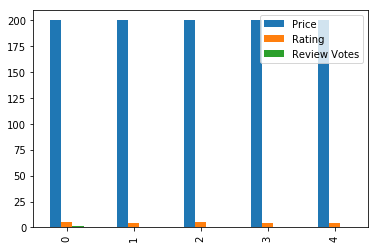

In [168]:
df.head().plot.bar()

In [169]:
df.isnull().any()

Product Name    False
Brand Name       True
Price            True
Rating          False
Reviews          True
Review Votes     True
dtype: bool

In [170]:
df.isnull().values.sum()

83462

In [171]:
df=df.dropna()
df.shape

(334335, 6)

In [172]:
#print ('Total Unique Product Name:',len(df['Product Name'].unique()))
print ('Total Unique Product Name:',len(df['Product Name'].unique()))
print ('Total Unique Brand Name:',len(df['Brand Name'].unique()))
print ('Total Unique Prices:',len(df['Price'].unique()))
print ('Total Unique Review Votes:',len(df['Review Votes'].unique()))
print (df['Rating'].unique())

Total Unique Product Name: 3675
Total Unique Brand Name: 378
Total Unique Prices: 1550
Total Unique Review Votes: 234
[5 4 1 2 3]


In [173]:
#Customer_Ratings = Amazon_Meta_Data.groupby(
Customer_Ratings = df.groupby(
    'Brand Name'
    ).Rating.agg(
        ['count', 'min', 'max','mean','median']
    ).sort_values(
        'count', ascending=False
    )
Customer_Ratings.head(15)

count  min  max      mean  median
Brand Name                                       
Samsung         63038    1    5  3.973032     5.0
BLU             59168    1    5  3.821069     5.0
Apple           56101    1    5  3.926597     5.0
LG              21636    1    5  3.848493     5.0
BlackBerry      16504    1    5  3.750121     5.0
Nokia           16166    1    5  3.824879     5.0
Motorola        13003    1    5  3.811736     5.0
HTC             12341    1    5  3.474030     4.0
CNPGD           12302    1    5  3.107869     3.0
OtterBox         7880    1    5  4.385279     5.0
Sony             7591    1    5  3.913450     5.0
Posh Mobile      6516    1    5  3.640884     4.0
Huawei           3146    1    5  4.297839     5.0
LG Electronics   3043    1    5  4.073940     5.0
samsung          2343    1    5  4.058045     5.0

In [174]:
Customer_Ratings= df.groupby('Brand Name')['Rating'].agg(['count','min','max','mean','median']).sort_values('count',ascending=False)
Customer_Ratings.head(10)

count  min  max      mean  median
Brand Name                                   
Samsung     63038    1    5  3.973032     5.0
BLU         59168    1    5  3.821069     5.0
Apple       56101    1    5  3.926597     5.0
LG          21636    1    5  3.848493     5.0
BlackBerry  16504    1    5  3.750121     5.0
Nokia       16166    1    5  3.824879     5.0
Motorola    13003    1    5  3.811736     5.0
HTC         12341    1    5  3.474030     4.0
CNPGD       12302    1    5  3.107869     3.0
OtterBox     7880    1    5  4.385279     5.0

In [175]:
Brand_products= df.groupby('Product Name')['Rating'].agg(['count','min','max','mean','median']).sort_values('count',ascending=False)
Brand_products.head(10)

count  min  max      mean  \
Product Name                                                                    
BLU Studio 5.0 C HD Unlocked Cellphone, Black        1122    1    5  4.242424   
OtterBox Iphone 5/5S/SE Defender Case w/ Drop a...   1115    1    5  3.976682   
Samsung Galaxy S Duos II S7582 DUAL SIM Factory...   1084    1    5  4.326568   
Motorola Moto E (1st Generation) - Black - 4 GB...   1069    1    5  4.430309   
BLU Energy X Plus Smartphone - With 4000 mAh Su...   1065    1    5  3.795305   
Apple iPhone 5s 32GB (Silver) - AT&T                 1060    1    5  4.006604   
Samsung Galaxy S Duos GT-S7562 GSM Unlocked Tou...   1059    1    5  3.611898   
Apple iPhone 4S 16GB Unlocked GSM - White (Cert...   1044    1    5  3.390805   
Samsung Galaxy S4 i9505 16GB LTE Unlocked Inter...   1041    1    5  3.756004   
BLU Energy X Plus Smartphone - With 4000 mAh Su...   1012    1    5  3.783597   

                                                    median  
Product Name                                                
BLU Studio 5.0 C HD Unlocked Cellphone, Black          5.0  
OtterBox Iphone 5/5S/SE Defender Case w/ Drop a...     5.0  
Samsung Galaxy S Duos II S7582 DUAL SIM Factory...     5.0  
Motorola Moto E (1st Generation) - Black - 4 GB...     5.0  
BLU Energy X Plus Smartphone - With 4000 mAh Su...     4.0  
Apple iPhone 5s 32GB (Silver) - AT&T                   5.0  
Samsung Galaxy S Duos GT-S7562 GSM Unlocked Tou...     4.0  
Apple iPhone 4S 16GB Unlocked GSM - White (Cert...     4.0  
Samsung Galaxy S4 i9505 16GB LTE Unlocked Inter...     5.0  
BLU Energy X Plus Smartphone - With 4000 mAh Su...     4.0

In [176]:
df.sort_values('Price')

Product Name Brand Name    Price  \
205952  Iphone 5 & 5S Replacement Belt Clip for OtterB...   OtterBox     1.73   
206031  Iphone 5 & 5S Replacement Belt Clip for OtterB...   OtterBox     1.73   
206030  Iphone 5 & 5S Replacement Belt Clip for OtterB...   OtterBox     1.73   
206029  Iphone 5 & 5S Replacement Belt Clip for OtterB...   OtterBox     1.73   
206028  Iphone 5 & 5S Replacement Belt Clip for OtterB...   OtterBox     1.73   
206027  Iphone 5 & 5S Replacement Belt Clip for OtterB...   OtterBox     1.73   
206026  Iphone 5 & 5S Replacement Belt Clip for OtterB...   OtterBox     1.73   
206025  Iphone 5 & 5S Replacement Belt Clip for OtterB...   OtterBox     1.73   
206024  Iphone 5 & 5S Replacement Belt Clip for OtterB...   OtterBox     1.73   
206023  Iphone 5 & 5S Replacement Belt Clip for OtterB...   OtterBox     1.73   
206022  Iphone 5 & 5S Replacement Belt Clip for OtterB...   OtterBox     1.73   
206021  Iphone 5 & 5S Replacement Belt Clip for OtterB...   OtterBox     1.73   
206020  Iphone 5 & 5S Replacement Belt Clip for OtterB...   OtterBox     1.73   
206019  Iphone 5 & 5S Replacement Belt Clip for OtterB...   OtterBox     1.73   
206018  Iphone 5 & 5S Replacement Belt Clip for OtterB...   OtterBox     1.73   
206017  Iphone 5 & 5S Replacement Belt Clip for OtterB...   OtterBox     1.73   
206016  Iphone 5 & 5S Replacement Belt Clip for OtterB...   OtterBox     1.73   
206015  Iphone 5 & 5S Replacement Belt Clip for OtterB...   OtterBox     1.73   
206014  Iphone 5 & 5S Replacement Belt Clip for OtterB...   OtterBox     1.73   
206013  Iphone 5 & 5S Replacement Belt Clip for OtterB...   OtterBox     1.73   
206012  Iphone 5 & 5S Replacement Belt Clip for OtterB...   OtterBox     1.73   
206011  Iphone 5 & 5S Replacement Belt Clip for OtterB...   OtterBox     1.73   
206010  Iphone 5 & 5S Replacement Belt Clip for OtterB...   OtterBox     1.73   
206009  Iphone 5 & 5S Replacement Belt Clip for OtterB...   OtterBox     1.73   
206008  Iphone 5 & 5S Replacement Belt Clip for OtterB...   OtterBox     1.73   
206007  Iphone 5 & 5S Replacement Belt Clip for OtterB...   OtterBox     1.73   
206006  Iphone 5 & 5S Replacement Belt Clip for OtterB...   OtterBox     1.73   
206005  Iphone 5 & 5S Replacement Belt Clip for OtterB...   OtterBox     1.73   
206004  Iphone 5 & 5S Replacement Belt Clip for OtterB...   OtterBox     1.73   
206003  Iphone 5 & 5S Replacement Belt Clip for OtterB...   OtterBox     1.73   
...                                                   ...        ...      ...   
306405  Samsung Galaxy A5 A500M 16GB Unlocked GSM 4G L...    Samsung  2408.73   
306396  Samsung Galaxy A5 A500M 16GB Unlocked GSM 4G L...    Samsung  2408.73   
306397  Samsung Galaxy A5 A500M 16GB Unlocked GSM 4G L...    Samsung  2408.73   
306398  Samsung Galaxy A5 A500M 16GB Unlocked GSM 4G L...    Samsung  2408.73   
306399  Samsung Galaxy A5 A500M 16GB Unlocked GSM 4G L...    Samsung  2408.73   
306400  Samsung Galaxy A5 A500M 16GB Unlocked GSM 4G L...    Samsung  2408.73   
306401  Samsung Galaxy A5 A500M 16GB Unlocked GSM 4G L...    Samsung  2408.73   
306402  Samsung Galaxy A5 A500M 16GB Unlocked GSM 4G L...    Samsung  2408.73   
306403  Samsung Galaxy A5 A500M 16GB Unlocked GSM 4G L...    Samsung  2408.73   
306404  Samsung Galaxy A5 A500M 16GB Unlocked GSM 4G L...    Samsung  2408.73   
306394  Samsung Galaxy A5 A500M 16GB Unlocked GSM 4G L...    Samsung  2408.73   
306406  Samsung Galaxy A5 A500M 16GB Unlocked GSM 4G L...    Samsung  2408.73   
306407  Samsung Galaxy A5 A500M 16GB Unlocked GSM 4G L...    Samsung  2408.73   
306409  Samsung Galaxy A5 A500M 16GB Unlocked GSM 4G L...    Samsung  2408.73   
306419  Samsung Galaxy A5 A500M 16GB Unlocked GSM 4G L...    Samsung  2408.73   
306418  Samsung Galaxy A5 A500M 16GB Unlocked GSM 4G L...    Samsung  2408.73   
306417  Samsung Galaxy A5 A500M 16GB Unlocked GSM 4G L...    Samsung  2408.73   
306416  Samsung Galaxy A5 A500M 16GB Unlocked GSM 4G L...    Samsung  2408.7

In [177]:
df.describe()

Price         Rating   Review Votes
count  334335.000000  334335.000000  334335.000000
mean      222.585019       3.824888       1.474515
std       283.139353       1.541203       9.217348
min         1.730000       1.000000       0.000000
25%        75.410000       3.000000       0.000000
50%       139.000000       5.000000       0.000000
75%       264.100000       5.000000       1.000000
max      2598.000000       5.000000     645.000000

(array([  57535.,       0.,   20068.,       0.,       0.,   26058.,
              0.,   50421.,       0.,  180253.]),
 array([ 1. ,  1.4,  1.8,  2.2,  2.6,  3. ,  3.4,  3.8,  4.2,  4.6,  5. ]),
 <a list of 10 Patch objects>)

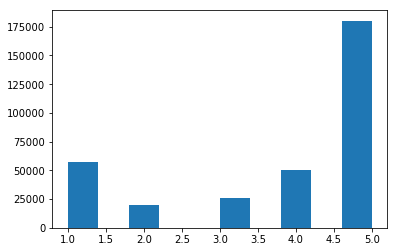

In [178]:
plt.hist(df['Rating'])

In [179]:
np.histogram(df['Price'],bins=4)

(array([320781,   8502,     12,   5040], dtype=int64),
 array([  1.73000000e+00,   6.50797500e+02,   1.29986500e+03,
          1.94893250e+03,   2.59800000e+03]))

In [180]:
#df.loc[df['Price'] <80, 'Price'] = 1

In [181]:
# To divide the continuous values into equal bins

#df['Price']=pd.qcut(df['Price'],4,labels=[1,2,3,4])

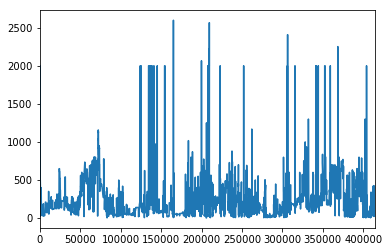

In [182]:
df['Price'].plot()

In [183]:
df[df['Price']<10]['Rating'].value_counts()

5    2313
1     616
4     569
3     339
2     241
Name: Rating, dtype: int64

In [184]:
df[df['Review Votes']==0].count()

Product Name    233064
Brand Name      233064
Price           233064
Rating          233064
Reviews         233064
Review Votes    233064
dtype: int64

In [185]:
df[df['Review Votes']==1].count()

Product Name    47265
Brand Name      47265
Price           47265
Rating          47265
Reviews         47265
Review Votes    47265
dtype: int64

In [186]:
df[df['Review Votes']>1].count()

Product Name    54006
Brand Name      54006
Price           54006
Rating          54006
Reviews         54006
Review Votes    54006
dtype: int64

In [187]:
print ('price null count',df['Price'].isnull().sum())
print ('Brand Name null count',df['Brand Name'].isnull().sum())

price null count 0
Brand Name null count 0


In [188]:
df.dtypes

Product Name     object
Brand Name       object
Price           float64
Rating            int64
Reviews          object
Review Votes    float64
dtype: object

In [189]:
#enc_brand=pd.get_dummies(df['Brand Name'])
#df= df.drop('Brand Name', axis=1)
#df=df.join(enc_brand)

In [192]:
df.shape

(334335, 6)

In [193]:
target=df['Rating']



In [194]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df["enc_brand"] = le.fit_transform(df["Brand Name"])
df[["enc_brand", "Brand Name"]].tail()
df["enc_brand"].unique()
df= df.drop('Brand Name', axis=1)
features=df.drop(['Product Name', 'Rating','Reviews'],axis=1)
#df["Brand Name"] = df["Brand Name"].cat.codes



In [159]:
print (df["enc_brand"].unique())

[247 186 108 126 343  46 116 211 198 156 112 124  73 212 312 182 304 129
 353   6   7   9 284 147 336  10 192  64 373  12 329 330  13  14  47  11
 337   1  15   2   3 338  21 179 206 208 332   5  16  22 326 377 346  25
 225  17  20  24 340 224 226  23 279  27  18 313  41 341  19  28 120   8
  30  87  32 233 370  43  44  34  33  45  35  36  37  38 308  39  40  50
  51 133 219  53  54  48 106  63  65  56  58  66 140  59  68  72  69  74
  77  79 174  81 325 231  76  90  91  93 115  94 344  84  96  95  85 118
  99 128  86  88 100 342 316 369 102 121 103 105 318 104 107 345 306 111
 109 327 160 376 113 277 363 354 117 348 275 351 114 119 350 125 297 122
  98 127 130 131  71 141 355 136 142 143 137 138 144 145 153 146 155 189
 123 320 349 157  57 154 158 356 148 149 322 150 152 200 228  83 151 159
 280 163 172 166 173 167 175 165 176 358  80  78  75 259 271 177 359 262
 180 360 178 170 181 169 135 184 270 110 257 263 339 185 168  97 361   4
 187 193 194 188 195 196 199 302 197  62 305 190 20

In [96]:
list(le.classes_)

['AMM Global Enterprises',
 'ARGOM TECH',
 'ASUS',
 'ASUS Computers',
 'AT&T',
 'ATT',
 'Acer',
 'Aeku',
 'AeroAntenna',
 'Alcatel',
 'Amazon',
 'Amazon.com, LLC *** KEEP PORules ACTIVE ***',
 'Android',
 'Apple',
 'Apple Computer',
 'Asus',
 'Atoah',
 'BLACKBERRY',
 'BLU',
 'BLUBOO',
 'Black Berry',
 'BlackBerry',
 'BlackBerry Storm 9530 Smartphone Unlocked GSM Wireless Handheld Device w/Camera Bluetooth 3.25" Touchscreen LCD',
 'Blackberrry',
 'Blackberry',
 'Blackberry (Rim)',
 'Blackphone',
 'Blackview',
 'Bluboo',
 'Blue',
 'BlueCosmo',
 'BlueSolar',
 'Boost Mobile',
 'CAT',
 'CAT PHONES',
 'CATERPILLAR',
 'CBSKY',
 'CECTDIGI',
 'CELLALLURE',
 'CHSLING',
 'CNPGD',
 'CT-Miami LLC',
 'CUBOT',
 'CablesOnline',
 'Casio',
 'Caterpillar',
 'Cedar Tree Technologies',
 'Certified Refurbished',
 'China',
 'Concox',
 'Conquest S8 Pro 3GB Smartphone (Black)',
 'Consumer Cellular',
 'Coolpad',
 'Crony',
 'Crown',
 'Cubot',
 'DIKOO',
 'DK',
 'DOOGEE',
 'DTECH',
 'Danger Inc.',
 'Dead Sea Secre

In [141]:
df.head()

Product Name   Price  Rating  \
0  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...  199.99       5   
1  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...  199.99       4   
2  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...  199.99       5   
3  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...  199.99       4   
4  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...  199.99       4   

                                             Reviews  Review Votes  enc_brand  
0  I feel so LUCKY to have found this used (phone...           1.0        247  
1  nice phone, nice up grade from my pantach revu...           0.0        247  
2                                       Very pleased           0.0        247  
3  It works good but it goes slow sometimes but i...           0.0        247  
4  Great phone to replace my lost phone. The only...           0.0        247

In [142]:
scaler=preprocessing.StandardScaler().fit(features)
features_stand= scaler.transform(features)
min_max_scaler = preprocessing.MinMaxScaler()
features_norm= min_max_scaler.fit_transform(features)

In [30]:
print (features.shape)
features_norm

(334335, 380)


array([[ 0.0763634 ,  0.00155039,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.0763634 ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.0763634 ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.03012784,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.03012784,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.03012784,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [143]:
from sklearn.decomposition import PCA
#pca = PCA(n_components=3, random_state=10)
pca = PCA(random_state=10)
pca.fit(features_stand)
print (pca.explained_variance_ratio_)
features_PCA= pca.transform(features_stand)

[ 0.3407955   0.33421329  0.32499122]


In [144]:
features_PCA.shape

(334335, 3)

In [145]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(features_PCA, target, test_size=0.2, random_state=10)

In [146]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm

clf_rf = RandomForestClassifier(random_state=10)
parameters={'n_estimators': [5,10,20], 'max_features':['sqrt','log2']}

clf_rf = GridSearchCV(clf_rf, parameters)


clf_lr= LogisticRegression(random_state=10)
clf_svm= svm.SVC(random_state=10)



In [147]:
rf_scores= cross_val_score(clf_rf,train_X, train_y,cv=10)
print ('RF score', rf_scores.mean())

RF score 0.543515490105


In [148]:
clf_lr.fit(train_X, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=10, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [149]:
clf_lr.score(test_X, test_y)

0.5428088593775704

# Gradient Boosted decision trees

In [150]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

In [151]:
train_X, test_X, train_y, test_y = train_test_split(features, target, test_size=0.2, random_state=10)

In [152]:
import sklearn
print (sklearn.__version__)


0.18.1


In [153]:
clf_gbdt = GradientBoostingClassifier().fit(train_X,train_y)
clf_gbdt.score(test_X, test_y)

0.54503716332421071

# XGBoost

In [154]:
from xgboost import XGBClassifier
clf_xgb = XGBClassifier().fit(train_X,train_y)
clf_xgb.score(test_X, test_y)

C:\Users\soumyad\AppData\Local\Continuum\Anaconda3N\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.54457355646282923

In [155]:
from sklearn.metrics import accuracy_score
y_pred= clf_xgb.predict(test_X)
accuracy =accuracy_score(test_y,y_pred)
print ("Accuracy: %2f%%" % (accuracy*100.0))

Accuracy: 54.457356%
